In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 8]

sns.set_style("whitegrid")




In [7]:
X, y = make_blobs(
    n_samples = 90,
    n_features = 2,
    centers = 3,
    cluster_std = 1
)

print(X.shape)
print(y.shape)

(90, 2)
(90,)


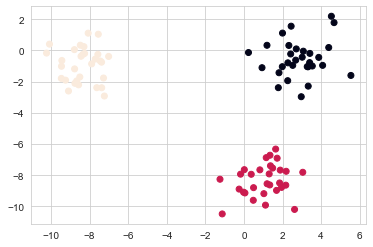

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y)

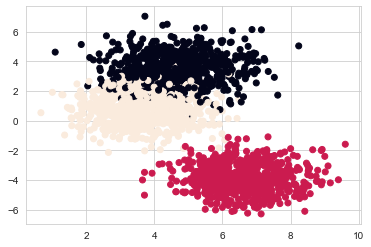

In [10]:
X, y = make_blobs(
    n_samples = 2000,
    n_features = 2,
    centers = 3,
    cluster_std = 1
)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [19]:
k = KMeans(n_clusters=3)

est = k.fit(X)

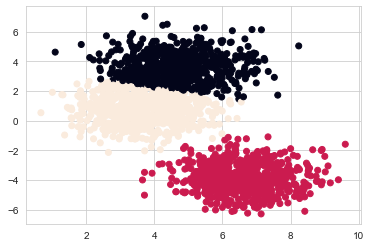

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=est.labels_)

In [23]:
inertia_list = []
points = []

for num_clusters in range(1, 11):
    model = KMeans(n_clusters=num_clusters)
    model.fit(X)
    inertia_list.append(model.inertia_)
    points.append((num_clusters, model.inertia_))
    


In [25]:
print(points)
print(inertia_list)

[(1, 25706.234843093134), (2, 6981.600349337464), (3, 3742.1565288310867), (4, 3239.913946832801), (5, 2804.1271717346135), (6, 2375.1238499415817), (7, 2064.196663516173), (8, 1803.5828107366626), (9, 1600.663624189471), (10, 1477.1237578453001)]
[25706.234843093134, 6981.600349337464, 3742.1565288310867, 3239.913946832801, 2804.1271717346135, 2375.1238499415817, 2064.196663516173, 1803.5828107366626, 1600.663624189471, 1477.1237578453001]


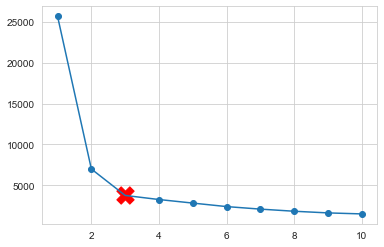

In [28]:
plt.plot(range(1, 11), inertia_list)
plt.scatter(range(1, 11), inertia_list)
plt.scatter(3, inertia_list[2], marker="X", s=300, c="r")

[(1, 25706.234843093134), (10, 1477.1237578453001)]
(1, 10) (25706.234843093134, 1477.1237578453001)
[[ 1.  1.]
 [10.  1.]]
Equation -> y = -2692.123453916426x + 28398.35829700956
[0.0, 0.0011060672893460318, 0.0011438263872673574, 0.0009927486431775888, 0.0008370861778288334, 0.0006809557286570199, 0.0005166793221452745, 0.0003489318478497369, 0.00017720407483924844, 0.0]
2
K value -> 3


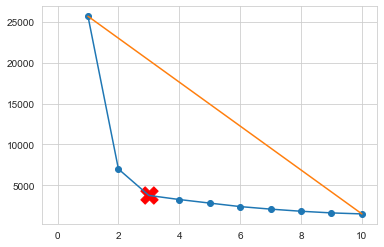

In [62]:
from numpy import vstack, ones
from numpy.linalg import lstsq

line_points = [
    points[0],
    points[-1]
]

x_coords, y_coords = zip(*line_points)


print(line_points)
print(x_coords, y_coords)

A = vstack([x_coords, ones(len(x_coords))]).T
print(A)
m, q = np.linalg.lstsq(A, y_coords, rcond=None)[0]

print(f"Equation -> y = {m}x + {q}")

distances = []

for i in points:
    xp = i[0]
    yp = i[1]
    d = abs(yp - m * xp - q) / ((1 + m**2))**1/2
    distances.append(d)
    
print(distances)

idx = distances.index(max(distances))

print(idx)

print(f"K value -> {points[idx][0]}")

In [47]:
def get_opt_k(points):
    from numpy import vstack, ones
    from numpy.linalg import lstsq

    line_points = [
        points[0],
        points[-1]
    ]

    x_coords, y_coords = zip(*line_points)


    print(line_points)
    print(x_coords, y_coords)

    A = vstack([x_coords, ones(len(x_coords))]).T
    print(A)
    m, q = np.linalg.lstsq(A, y_coords, rcond=None)[0]

    print(f"Equation -> y = {m}x + {q}")

    distances = []

    for i in points:
        xp = i[0]
        yp = i[1]
        d = abs(yp - m * xp - q) / ((1 + m**2))**1/2
        distances.append(d)

    print(distances)

    idx = distances.index(max(distances))

    print(idx)

    print(f"K value -> {points[idx][0]}")
    
    return idx



[(1, 25706.234843093134), (10, 1477.1237578453001)]
(1, 10) (25706.234843093134, 1477.1237578453001)
[[ 1.  1.]
 [10.  1.]]
Equation -> y = -2692.123453916426x + 28398.35829700956
[0.0, 0.0011060672893460318, 0.0011438263872673574, 0.0009927486431775888, 0.0008370861778288334, 0.0006809557286570199, 0.0005166793221452745, 0.0003489318478497369, 0.00017720407483924844, 0.0]
2
K value -> 3
3


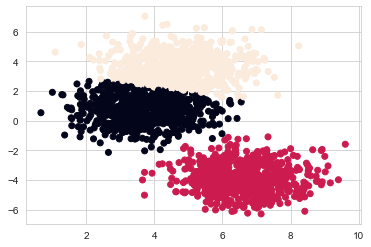

In [55]:
opt_k = get_opt_k(points)
print(points[opt_k][0])

model = KMeans(n_clusters=points[opt_k][0])

model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)



In [50]:
!pip install kneed

from kneed import KneeLocator
x = [ p[0] for p in points ]
y = [ p[1] for p in points ]

print(x, y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [25706.234843093134, 6981.600349337464, 3742.1565288310867, 3239.913946832801, 2804.1271717346135, 2375.1238499415817, 2064.196663516173, 1803.5828107366626, 1600.663624189471, 1477.1237578453001]


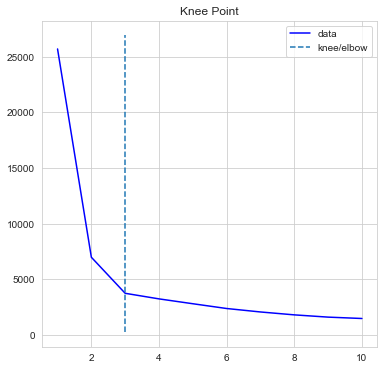

In [51]:
knee = KneeLocator(x, y, curve="convex", direction="decreasing")
knee.plot_knee()

In [52]:
print(dir(knee))

['Ds_y', 'N', 'S', 'Tmx', '_KneeLocator__normalize', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'all_elbows', 'all_elbows_y', 'all_knees', 'all_knees_y', 'all_norm_elbows', 'all_norm_elbows_y', 'all_norm_knees', 'all_norm_knees_y', 'curve', 'direction', 'elbow', 'elbow_y', 'find_knee', 'knee', 'knee_y', 'maxima_indices', 'minima_indices', 'norm_elbow', 'norm_elbow_y', 'norm_knee', 'norm_knee_y', 'online', 'plot_knee', 'plot_knee_normalized', 'polynomial_degree', 'transform_y', 'x', 'x_difference', 'x_difference_maxima', 'x_difference_minima', 'x_normalized', 'y', 'y_difference', 'y_difference_maxima', 'y_difference_minima', 'y_normalized']


In [53]:
print(knee.knee)



3


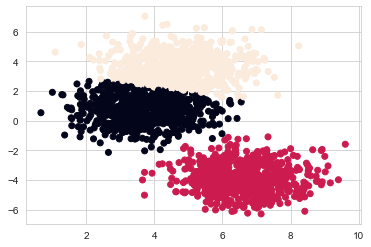

In [54]:

model = KMeans(n_clusters=knee.knee)

model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)